In [2]:
from sklearn.datasets import fetch_20newsgroups
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

# Download the NLTK stop words if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

# Fetch the 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups(subset='all')

# Get the stop words
stop_words = set(stopwords.words('english'))

# Tokenize the text, remove punctuation and stop words
words_in_texts = []
for text in newsgroups_data.data:
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.lower()  # convert to lower case
    words = word_tokenize(text)  # split text into words
    words = [word for word in words if word not in stop_words]  # remove stop words
    words_in_texts.append(words)

# Initialize the model
model = Word2Vec(vector_size=100, min_count=5)  # min_count is now 5, this means a word has to occur at least 5 times to be included in the model

# Build the vocabulary
model.build_vocab(words_in_texts)

# Train the model
model.train(words_in_texts, total_examples=model.corpus_count, epochs=10)

# Save the model
model.save("word2vec1.model")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kinla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kinla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
vector = model.wv['computer']
similar_words = model.wv.most_similar('computer', topn=5)

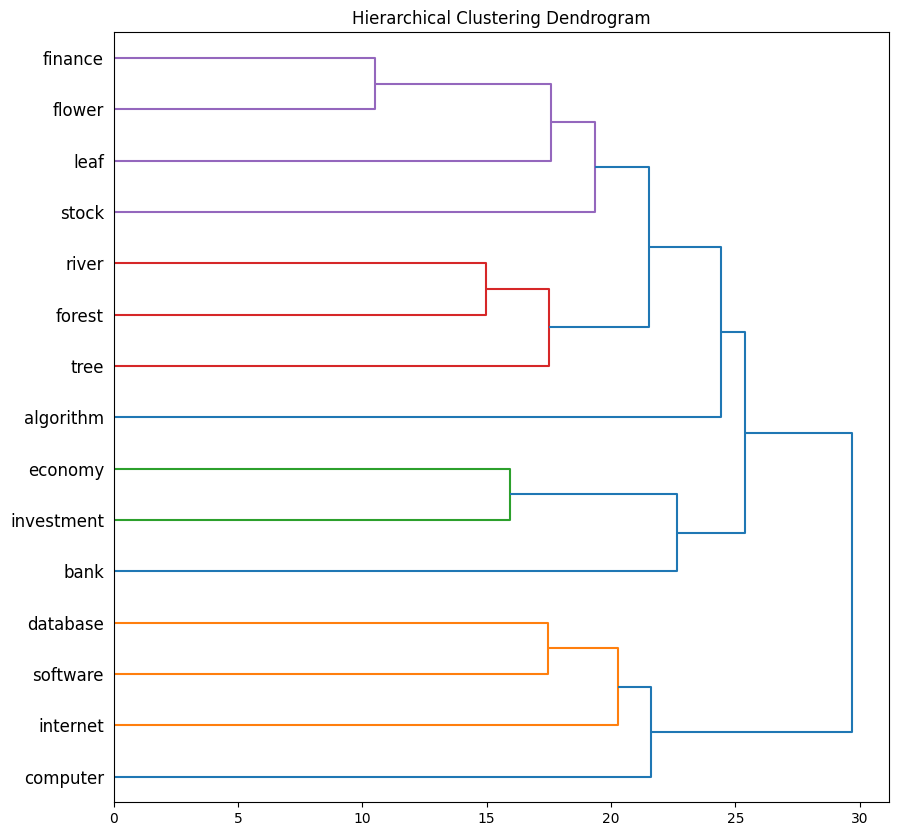

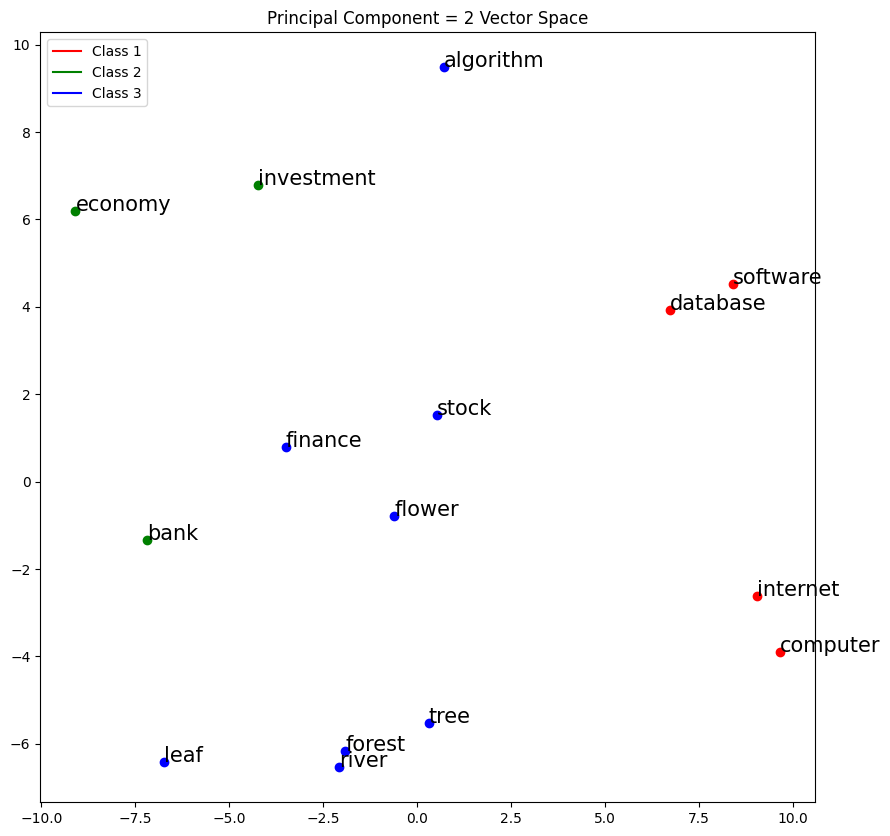

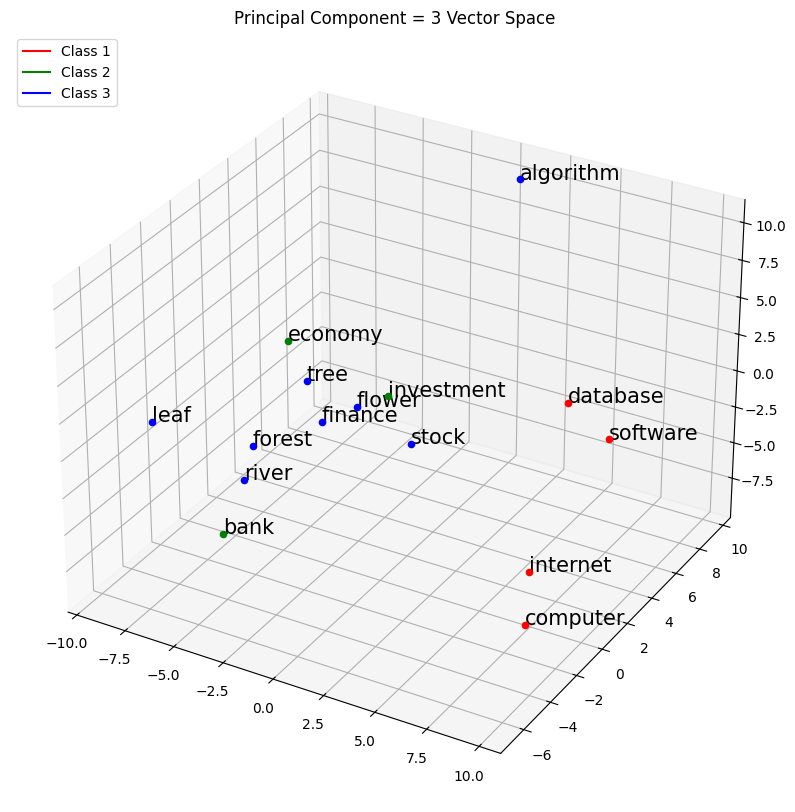

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import numpy as np

def visualize_model(model, words, n_clusters=3):
    word_vectors = [model.wv[word] for word in words]

    # Perform hierarchical clustering
    Z = linkage(word_vectors, 'ward')

    # Create a dendrogram
    plt.figure(figsize=(10, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(Z, labels=words, orientation='right')
    plt.show()

    # Assign each word to a cluster, based on the dendrogram
    labels = fcluster(Z, n_clusters, criterion='maxclust')

    # Reduce dimensionality to 2
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    # Create a scatter plot
    plt.figure(figsize=(10, 10))
    plt.title('Principal Component = 2 Vector Space')
    colors = ['red', 'green', 'blue', 'purple', 'orange']  # edit as needed
    for word, coord, label in zip(words, word_vectors_2d, labels):
        x, y = coord
        plt.scatter(x, y, color=colors[label-1])
        plt.text(x, y, f'{word}', size=15)

    # Add legend manually
    for i in range(n_clusters):
        plt.plot(0, 0, '-', label=f'Class {i+1}', color=colors[i])
    plt.legend(loc='upper left')

    # Show the plot
    plt.show()

    # Reduce dimensionality to 3
    pca = PCA(n_components=3)
    word_vectors_3d = pca.fit_transform(word_vectors)

    # Create a scatter plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('Principal Component = 3 Vector Space')
    colors = ['red', 'green', 'blue', 'purple', 'orange']  # edit as needed
    for word, coord, label in zip(words, word_vectors_3d, labels):
        x, y, z = coord
        ax.scatter(x, y, z, color=colors[label-1])
        ax.text(x, y, z, f'{word}', size=15)

    # Add legend manually
    for i in range(n_clusters):
        ax.plot([0], [0], [0], '-', label=f'Class {i+1}', color=colors[i])
    ax.legend(loc='upper left')

    # Show the plot
    plt.show()


words = ['computer', 'internet', 'software', 'algorithm', 'database',  # Technology related words
         'tree', 'leaf', 'flower', 'forest', 'river',  # Nature related words
         'stock', 'investment', 'finance', 'economy', 'bank']  # Finance related words

# Visualize the model before training
visualize_model(model, words)